In [1]:
import pandas as pd

filename = '../../data/prima-indians-diabetes.csv'
names = ['Preg', 'Plas', 'Pres', 'Skin',
         'Test', 'Mass', 'Pedi', 'Age', 'Class']

df = pd.read_csv(filename, names=names)
array = df.values

x = array[:, :8]
y = array[:, 8]


In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_x = scaler.fit_transform(x)
np.set_printoptions(precision=3)

In [3]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(x)
rescaled_x=scaler.transform(x)
print(names)
print(rescaled_x[:5,:])

['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class']
[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


C:\Python38\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


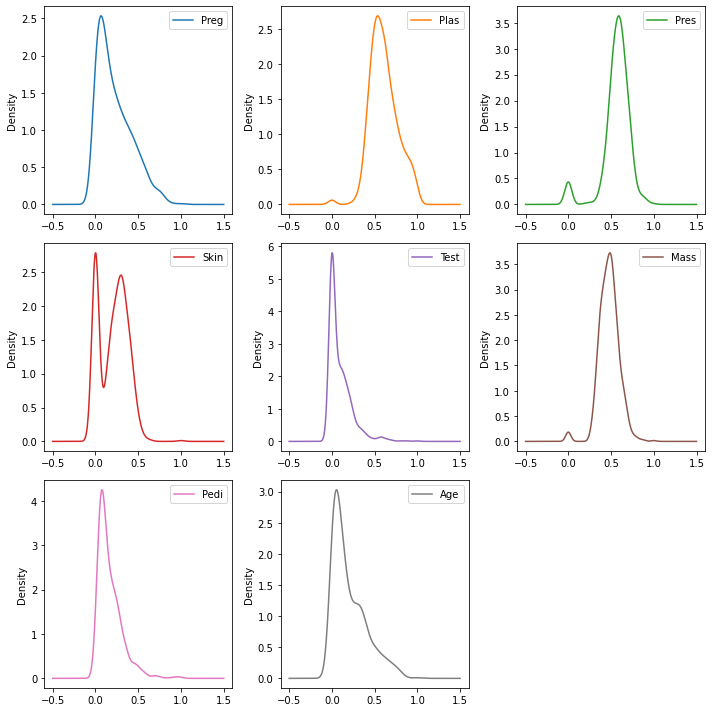

In [4]:
import matplotlib.pyplot as plt

transform_df = pd.DataFrame(rescaled_x, columns=names[0:8])
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
transform_df.plot(ax=ax, kind='density', subplots=True, layout=(3, 3))
plt.tight_layout()
plt.show()


In [5]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=50.0).fit(x)
binary_x = binarizer.transform(x)
print(names)
print(binary_x[:5,:])

['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class']
[[0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]]


In [6]:
from sklearn.preprocessing import PowerTransformer
features = df[['Pedi', 'Age']]
pt=PowerTransformer(method="box-cox",standardize=True)

# Fit the data to the powertransformer
skl_boxcox=pt.fit(features)

# Transform the data
skl_boxcox=pt.transform(features)
df_features=pd.DataFrame(data=skl_boxcox, columns=['pedi','age'])
df_features

,pedi,age
0,0.776754,1.362797
1,-0.112234,0.127990
2,0.880461,0.231506
3,-1.306876,-1.483064
4,2.629492,0.328461
...,...,...
763,-1.267799,1.764261
764,-0.162124,-0.366775
765,-0.682369,0.017237
766,-0.121179,1.236934


In [7]:
new_df = df.drop(columns=["Pedi", "Age"])
df_data = pd.concat([df_features, new_df], axis=1)
df_data


,pedi,age,Preg,Plas,Pres,Skin,Test,Mass,Class
0,0.776754,1.362797,6,148,72,35,0,33.6,1
1,-0.112234,0.127990,1,85,66,29,0,26.6,0
2,0.880461,0.231506,8,183,64,0,0,23.3,1
3,-1.306876,-1.483064,1,89,66,23,94,28.1,0
4,2.629492,0.328461,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-1.267799,1.764261,10,101,76,48,180,32.9,0
764,-0.162124,-0.366775,2,122,70,27,0,36.8,0
765,-0.682369,0.017237,5,121,72,23,112,26.2,0
766,-0.121179,1.236934,1,126,60,0,0,30.1,1


C:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

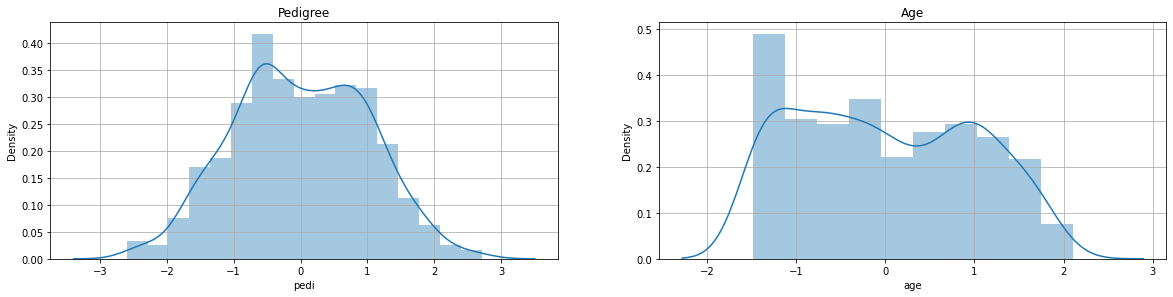

In [8]:
import seaborn as sea

plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sea.distplot(df_data['pedi'])
plt.title("Pedigree")
plt.grid(True)
plt.subplot(422)
sea.distplot(df_data['age'])
plt.title("Age")
plt.grid(True)
